In [1]:
# For data creation and other tasks
import numpy as np
import random
import scipy
from scipy.stats import norm
import pandas as pd

## Mertics to evaluate the models 
from sklearn.metrics import r2_score  # For Linear Regression 
from sklearn.metrics import accuracy_score # for Logistic Regression

# For plotting the graphs.. 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# For spliting the data into 80:20 ratio 
from sklearn.model_selection import train_test_split


## 1. Data Generation 

In [2]:
def generate_data(n,m,theta):
    X = []
    # m = 3  #change to user defined 
    # n = 100   #change to user defined 
    theta = int(n*(theta))  #change to user defined 
    for i in range(0,n):
        X_i = scipy.stats.norm.rvs(0,1,m)
        X.append(X_i)
    
    beta = scipy.stats.norm.rvs(0,1,m)
    # for simplicity I am not adding '1' to either beta or X rather directly adding it to the 'odds' that will
    ## be used as y1 which will be passed through cost fn with theta which will define whether it will be 
    ### '1' or '0' (bernolli distribution)
    odds =  (np.exp(1+ np.matmul(X,beta)) / ( 1 + np.exp(1+ np.matmul(X,beta)) )) 
    y1 = []
    for i in odds:
        if(i >= 0.5):
            y1.append(1)
        else:
            y1.append(0)
    df1 = pd.DataFrame(X)
    df2 = pd.DataFrame(y1)
    df1['Y'] = df2[0]
    #df1.head()
    #df1.tail()

    ## Adding noise using theta 
    change = df1.sample(theta).index
    
    for i in change:
        if(df1.loc[i,'Y'] == 0):
            df1.loc[i,'Y'] = 1 
        else:
            df1.loc[i,'Y'] = 0 
    return df1

## 2. Main Logistic Regression Functions 

In [3]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [4]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [5]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [6]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [7]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [8]:
def Log_Res(n,m,theta,learning_rate,no_iterations):
    df1 = generate_data(n,m,theta)
        
    X1 = df1.iloc[:,0:m].values
    y1 = df1.iloc[:,m].values
        
    X_train,X_test,Y_train,Y_test = train_test_split(X1,y1,test_size = 0.2)
    n_features = X_train.shape[1]
    print('Number of Features', n_features)
    w, b = weightInitialization(n_features)
    #Gradient Descent
    coeff, gradient, costs = model_predict(w, b, X_train, Y_train,learning_rate=0.0001,no_iterations=45000)
    #Final prediction
    w = coeff["w"]
    b = coeff["b"]
    print('Optimized weights - Beta', w)
    print('Optimized intercept',b)
    #
    final_train_pred = sigmoid_activation(np.dot(w,X_train.T)+b)
    final_test_pred = sigmoid_activation(np.dot(w,X_test.T)+b)
    #
    m_tr =  X_train.shape[0]
    m_ts =  X_test.shape[0]
       #
    y_tr_pred = predict(final_train_pred, m_tr)
    print('Training Accuracy',accuracy_score(y_tr_pred.T, Y_train))
    #
    y_ts_pred = predict(final_test_pred, m_ts)
    print('Test Accuracy',accuracy_score(y_ts_pred.T, Y_test))
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()

## 3.  Effects of noise in the data 

Number of Features 3
Optimized weights - Beta [[ 0.49147058  0.33307244 -0.10647489]]
Optimized intercept 1.073462912826257
Training Accuracy 0.925
Test Accuracy 0.975


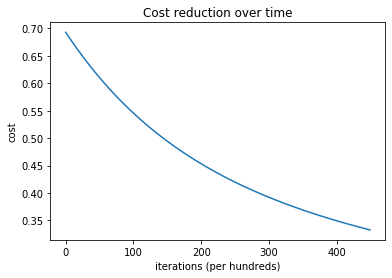

In [9]:
## when there is no noise 
Log_Res(200,3,0.01,learning_rate=0.0001,no_iterations=5000)

Number of Features 3
Optimized weights - Beta [[ 0.37886315 -0.32334046  0.74755692]]
Optimized intercept 0.2840615154386258
Training Accuracy 0.8375
Test Accuracy 0.775


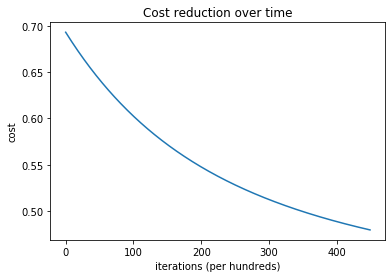

In [10]:
## when there is some noise (10% noise)
Log_Res(200,3,0.1,learning_rate=0.0001,no_iterations=5000)

Number of Features 3
Optimized weights - Beta [[-0.08696231  0.15534048 -0.12678951]]
Optimized intercept 0.41090004657848117
Training Accuracy 0.6625
Test Accuracy 0.675


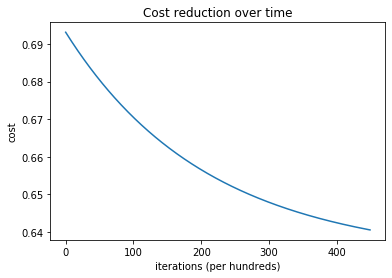

In [11]:
## when there is a lot of noise (30% noise)
Log_Res(200,3,0.3,learning_rate=0.0001,no_iterations=5000)

The above results are self explanatory that as we keep on increasing the noise in the data we experience relative drop in the accuracy of prediction significantly. 

## Effects of changing value of n 

Number of Features 3
Optimized weights - Beta [[-0.26448499 -0.88842272  0.17761447]]
Optimized intercept 0.6452931475616653
Training Accuracy 0.975
Test Accuracy 1.0


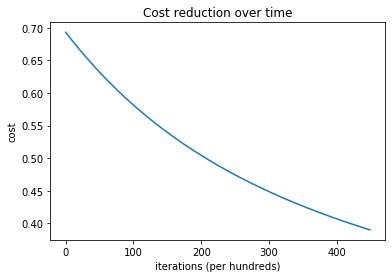

In [12]:
## when n is small n = 50
Log_Res(50,3,0.01,learning_rate=0.0001,no_iterations=5000)

Number of Features 3
Optimized weights - Beta [[-0.24616456 -0.54660321  0.63180794]]
Optimized intercept 0.784444770815206
Training Accuracy 0.9825
Test Accuracy 0.97


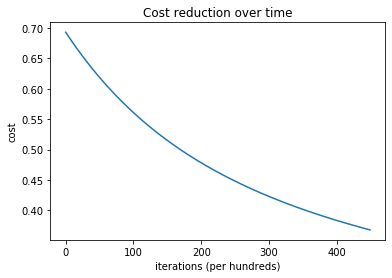

In [13]:
## when n is large n = 500
Log_Res(500,3,0.001,learning_rate=0.0001,no_iterations=5000)

Number of Features 3
Optimized weights - Beta [[ 0.71737753 -0.20937425  0.18726303]]
Optimized intercept 0.9063179106347478
Training Accuracy 0.945125
Test Accuracy 0.935


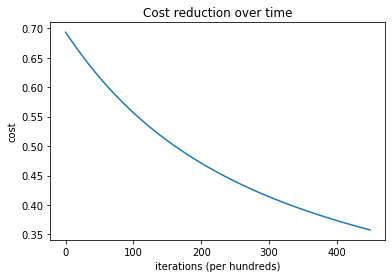

In [14]:
## when n is very large n = 1000
Log_Res(10000,3,0.0,learning_rate=0.0001,no_iterations=5000)

When the size of the dataset was increased the computation incereased However there wasn't much change in the accuracy. There was a drop in it but it can be justified as the dataset was very large (1Lakh elements = n). Having a very large dataset sometimes overfit the model as the model only needs to learn those parameters that can easily help us to find the theta(probablity of classification) using which we can evaluate the input we get. 

## 4. L1 and L2 regularization

In [15]:
## we are only changing the cost function and reusing the rest of the functions/code ..

lam = 0.1
def model_optimize_for_L1(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))  + (lam * (np.sum(w)))

    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T)) + lam
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict_l1(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize_for_L1(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [16]:
lam = 0.1
def model_optimize_for_L2(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))  + (lam * (np.sum(np.square(w))))

    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T)) + lam * w
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict_l2(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize_for_L2(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [17]:
def Log_reg_L1_L2(n,m,theta,learning_rate,no_iterations):
    df1 = generate_data(n,m,theta)
        
    X1 = df1.iloc[:,0:m].values
    y1 = df1.iloc[:,m].values
        
    X_train,X_test,Y_train,Y_test = train_test_split(X1,y1,test_size = 0.2)
    n_features = X_train.shape[1]
    print('Number of Features', n_features)
    w, b = weightInitialization(n_features)
    #Gradient Descent for L1 reguralisation
    coeff1, gradient1, costs1 = model_predict_l1(w, b, X_train, Y_train,learning_rate=0.0001,no_iterations=45000)
     
    #Final prediction
    w1 = coeff1["w"]
    b1 = coeff1["b"]
    print('Optimized weights - Beta', w1)
    print('Optimized intercept',b1)
    #
    final_train_pred = sigmoid_activation(np.dot(w1,X_train.T)+b1)
    final_test_pred = sigmoid_activation(np.dot(w1,X_test.T)+b1)
    #
    m_tr =  X_train.shape[0]
    m_ts =  X_test.shape[0]
       #
    y_tr_pred = predict(final_train_pred, m_tr)
    print('Training Accuracy',accuracy_score(y_tr_pred.T, Y_train))
    #
    y_ts_pred = predict(final_test_pred, m_ts)
    print('Test Accuracy',accuracy_score(y_ts_pred.T, Y_test))
    
    plt.plot(costs1)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()
    
    
    #Gradient Descent for L2 reguralisation
    coeff2, gradient2, costs2 = model_predict_l2(w, b, X_train, Y_train,learning_rate=0.0001,no_iterations=45000)
    #Final prediction
    w2 = coeff2["w"]
    b2 = coeff2["b"]
    print('Optimized weights - Beta', w2)
    print('Optimized intercept',b2)
    #
    final_train_pred = sigmoid_activation(np.dot(w2,X_train.T)+b2)
    final_test_pred = sigmoid_activation(np.dot(w2,X_test.T)+b2)
    #
    m_tr =  X_train.shape[0]
    m_ts =  X_test.shape[0]
       #
    y_tr_pred = predict(final_train_pred, m_tr)
    print('Training Accuracy',accuracy_score(y_tr_pred.T, Y_train))
    #
    y_ts_pred = predict(final_test_pred, m_ts)
    print('Test Accuracy',accuracy_score(y_ts_pred.T, Y_test))
    
    plt.plot(costs2)
    plt.ylabel('cost2')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()
  

Number of Features 3
Optimized weights - Beta [[-1.03096369  0.26059818  0.20588975]]
Optimized intercept 0.39944791613485126
Training Accuracy 0.85
Test Accuracy 0.875


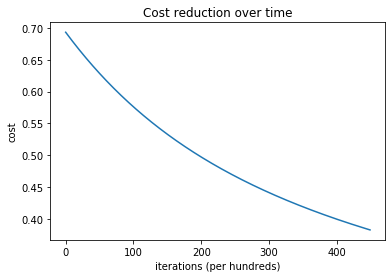

Optimized weights - Beta [[-0.62032646  0.73277554  0.64870792]
 [-0.87295916  0.47564961  0.40602759]
 [-0.8586804   0.48817674  0.41797666]]
Optimized intercept 0.648173216113892
Training Accuracy 0.9125
Test Accuracy 0.975


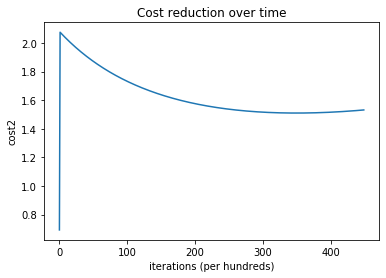

In [18]:
## when using L1 reg and L2 reg
Log_reg_L1_L2(200,3,0.01,learning_rate=0.0001,no_iterations=5000)

Though both L1 reg. and L2 reg. should have the same effects yet the training and test accuracies have been different. 
The affect on beta/weights have been that they have been shrinked a little. 
The effects were not that visible as the data is between [0,1] and thus weights/beta are also between the range [0,1] and near 0.0.

## 5. Adding Linear Regression and re-using already written code.

In [19]:
def model_optimize_LR(w,b,X,Y):
    #
    m = X.shape[0]
    #
    final_result = np.dot(w, X.T) + b
    cost = (1/m)*np.sum((Y.T - final_result) ** 2)
    #
    dw = (-2/m)*np.sum((np.dot(X.T,(Y.T - final_result).T)))
    db = (-2/m)*np.sum(((Y.T - final_result)))
    #
    grads = {"dw": dw, "db": db}
    
    return grads, cost


def gradientUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize_LR(w,b, X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs


def predict(x,w,b):
    final_pred = np.dot(w, x.T) + b
    return final_pred

In [20]:
def Linear_reg(n,m,theta,learning_rate,no_iterations):
    
    df1 = generate_data(n,m,theta)
        
    X1 = df1.iloc[:,0:m].values
    y1 = df1.iloc[:,m].values
        
    X_train,X_test,Y_train,Y_test = train_test_split(X1,y1,test_size = 0.2)
    n_features = X_train.shape[1]

    m_tr = X_train.shape[0]
    m_ts = X_test.shape[0]
    print('Number of Features', n_features)
    w, b = weightInitialization(n_features)
    #Gradient Descent
    coeff, gradient, costs = gradientUpdate(w, b, X_train, Y_train, learning_rate=0.0001,no_iterations=20)
    #Final prediction
    w = coeff["w"]
    b = coeff["b"]
    print('Optimized weights', w)
    print('Optimized intercept',b)
    #
    final_tr_pred = predict(X_train, w,b)
    final_tr_cost = (1/m_tr)*np.sum((Y_train.T - final_tr_pred) ** 2)
    print('Training error',final_tr_cost)
    #
    final_ts_pred = predict(X_test, w,b)
    final_ts_cost = (1/m_ts)*np.sum((Y_test.T - final_ts_pred) ** 2)
    print('Test error',final_ts_cost)
    #
    print('Model R^2 Square value', r2_score(Y_test, final_ts_pred.T))
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()
    

Number of Features 3
Optimized weights [[-0.0007229 -0.0007229 -0.0007229]]
Optimized intercept 0.0033686421824978613
Training error 0.8378154671444022
Test error 0.8931597450637689
Model R^2 Square value -8.92399716737521


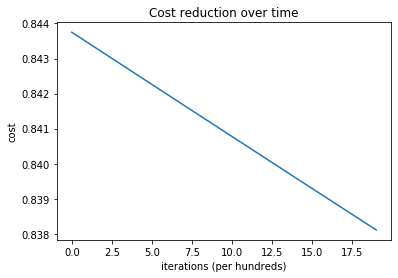

In [21]:
n,m,theta,learning_rate,no_iterations = 200,3,0.01,0.0001,5000
Linear_reg(n,m,theta,learning_rate,no_iterations)

Here I tried to use most of the previous code. However the cost fn and gradient fun. evaluation fn had to recreated.  

Conclusion 

For binary classification Logistic Regression works great.
Even when the dataset increases it still does a good job in classification.
L1 L2 regularisation can be done if the dataset is large to decrease the complexity of the model. 
If noise is large then the model's accuracy does decreases.

I hope all Parts of the assignment have be answered..